# Practice Assignment 2 - Part 1
### Exercise 10 (Chapter 3, ISLR)
This notebook addresses Exercise 10 from Chapter 3 of ISLR, using the Carseats dataset. It involves fitting and interpreting multiple linear regression models, handling qualitative variables, testing hypotheses about coefficients, simplifying the model, and checking for outliers or leverage points.

In [8]:
# Remove All Environment Variables
rm(list = ls())

**Tasks:**

(a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.  
(b) Interpret each coefficient, noting which variables are qualitative.  
(c) Write out the model in equation form, carefully handling qualitative variables.  
(d) Determine for which predictors we can reject the null hypothesis $H_0: \beta_j = 0$.  
(e) Fit a reduced model using only those predictors deemed significant.  
(f) Compare the fit of the models from (a) and (e).  
(g) Obtain 95% confidence intervals for the coefficients of the model in (e).  
(h) Check for outliers or high leverage observations.

In [6]:
# Load necessary packages
library(ISLR)     # Contains the Carseats dataset
library(MASS)

In [7]:
# Load and inspect the data
head(Carseats)
summary(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

## (a) Fit a Multiple Regression Model

We will predict `Sales` using `Price`, `Urban`, and `US`.

**Model:**  
$ \text{Sales} = \beta_0 + \beta_1 \cdot \text{Price} + \beta_2 \cdot \text{UrbanYes} + \beta_3 \cdot \text{USYes} + \epsilon $

Where `UrbanYes` and `USYes` are dummy variables created from the qualitative predictors `Urban` and `US`.

In [9]:
lm.fit <- lm(Sales ~ Price + Urban + US, data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


## (b) Interpret Each Coefficient

- **Intercept ($\beta_0$):** The expected sales when Price=0, Urban=No, and US=No.
- **Price ($\beta_1$):** The expected change in Sales for a one-unit increase in Price, holding other factors constant. A negative coefficient suggests that increasing the price reduces sales.
- **UrbanYes ($\beta_2$):** The difference in expected Sales between stores in urban locations vs. non-urban, holding Price and US constant. As we shall see, this predictor is not significant.
- **USYes ($\beta_3$):** The difference in expected Sales for stores in the US vs. not in the US, holding Price and Urban constant.

## (c) Equation Form

Let’s denote the dummy variables:
- Urban: `UrbanYes = 1` if Urban = Yes, and `0` if Urban = No.
- US: `USYes = 1` if US = Yes, and `0` if US = No.

The model is:
$$\text{Sales} = \hat{\beta}_0 + \hat{\beta}_1 \cdot \text{Price} + \hat{\beta}_2 \cdot \text{UrbanYes} + \hat{\beta}_3 \cdot \text{USYes}.$$

## (d) Hypothesis Testing

We test $H_0: \beta_j = 0$ vs. $H_a: \beta_j \neq 0$ for each predictor.

We look at the p-values from the summary. Predictors with p-value < 0.05 (commonly used $\alpha$) are considered statistically significant.

From the model summary:
- Price is significant (very low p-value).
- UrbanYes is not significant (p-value > 0.05).
- USYes is significant (p-value < 0.05).

## (e) Reduced Model

Based on the significance tests, we drop `Urban` from the model and refit using only `Price` and `US`.

In [10]:
lm.fit2 <- lm(Sales ~ Price + US, data=Carseats)
summary(lm.fit2)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


## (f) Model Fit Comparison

We compare the models (a) and (e):

- Both have similar $R^2$ and adjusted $R^2$.
- Removing `Urban` does not reduce explanatory power significantly.
- Residual standard error and F-statistics are similar.

Hence, the simpler model (e) fits about as well as the full model (a).

## (g) 95% Confidence Intervals for Coefficients

From the reduced model, we compute:
$$ \hat{\beta}_j \pm t_{\alpha/2, df} \cdot SE(\hat{\beta}_j) $$

We can use `confint()` in R to get these intervals.

In [12]:
confint(lm.fit2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


## (h) Outliers or High-Leverage Observations

We will inspect diagnostic plots:
- Residuals vs. Fitted plot to identify patterns or outliers.
- Normal Q-Q plot to check normality.
- We can also look at standardized residuals or leverage.

No major outliers or high leverage points are strongly evident, but a few points may stand out. Further analysis could involve `influence.measures(lm.fit2)` or `plot(lm.fit2, which=4)`.

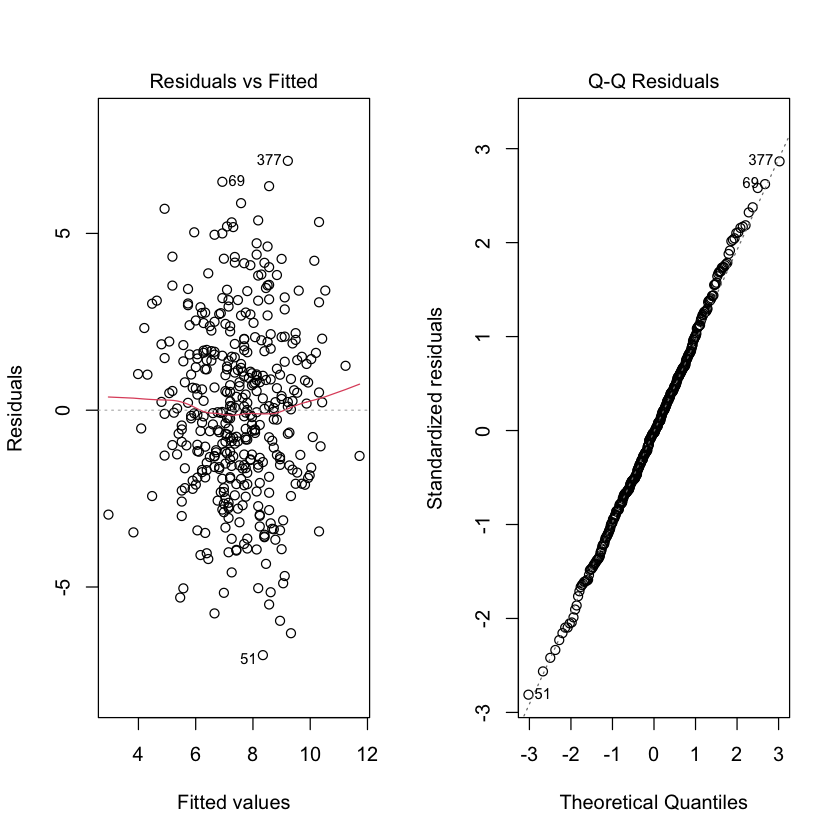

In [13]:
par(mfrow=c(1,2))
plot(lm.fit2, which=1) # Residuals vs Fitted
plot(lm.fit2, which=2) # Normal Q-Q
par(mfrow=c(1,1))